<a href="https://colab.research.google.com/github/seongwoojang1123/Exploring-Key-Determinants-of-Halitosis-Through-a-Data-Analysis/blob/main/2_Halitosis_data_initial_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
file_path = '/content/drive/MyDrive/Halitosis/241121_Halitosis_data preprocessing.xlsx'

df = pd.read_excel(file_path)

Halitosis_subjective Label Check

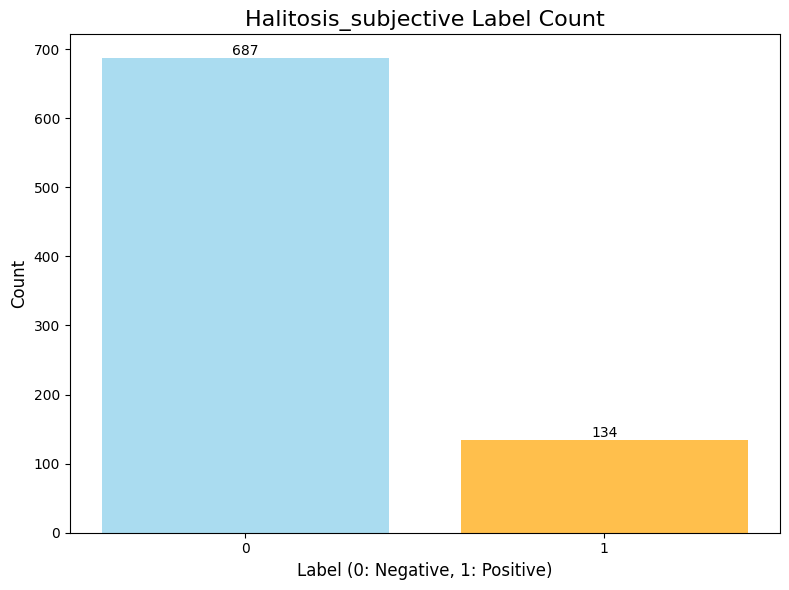

In [3]:
label_counts = df['Halitosis_subjective'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index.astype(str), label_counts, color=['skyblue', 'orange'], alpha=0.7)
plt.title("Halitosis_subjective Label Count", fontsize=16)
plt.xlabel("Label (0: Negative, 1: Positive)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(label_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [24]:
input_features = [
    'Sex', 'Age', 'Elderly', 'Super_Elderly', 'Xerostomia_subjective',
    'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS', 'StickySaliva', 'Oralhygiene',
    'Calculus', 'O_Stomatitis', 'O_RAU', 'O_Candidiasis', 'O_Periodontitis',
    'O_LichenPlanus', 'O_Sialodochitis', 'O_Glossodynia', 'O_BMS',
    'S_Hypertension', 'S_DM', 'S_Hyperlipidemia', 'S_RenalDiseases',
    'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis', 'S_CVD', 'S_TD',
    'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma', 'S_CancerOp',
    'NumberofSystmicDiseases', 'M_Hypertension', 'M_DM', 'M_Osteoporosis',
    'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI', 'M_UrinaryDiseases',
    'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic', 'M_SleepingPills',
    'M_Aspirin'
]
target_feature = 'Halitosis_subjective'

X = df[input_features]
y = df[target_feature]

# Data Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

# SMOTE, Train Data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)

# StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Class Distribution
print("Original class distribution in Train set:")
print(y_train.value_counts())
print("\nResampled class distribution in Train set:")
print(pd.Series(y_train_res).value_counts())

print("\nOriginal class distribution in Validation set:")
print(y_val.value_counts())

print("\nOriginal class distribution in Test set:")
print(y_test.value_counts())

Train: (492, 48) (492,)
Validation: (164, 48) (164,)
Test: (165, 48) (165,)
After SMOTE: (824, 48) (824,)
Original class distribution in Train set:
Halitosis_subjective
0    412
1     80
Name: count, dtype: int64

Resampled class distribution in Train set:
Halitosis_subjective
0    412
1    412
Name: count, dtype: int64

Original class distribution in Validation set:
Halitosis_subjective
0    137
1     27
Name: count, dtype: int64

Original class distribution in Test set:
Halitosis_subjective
0    138
1     27
Name: count, dtype: int64


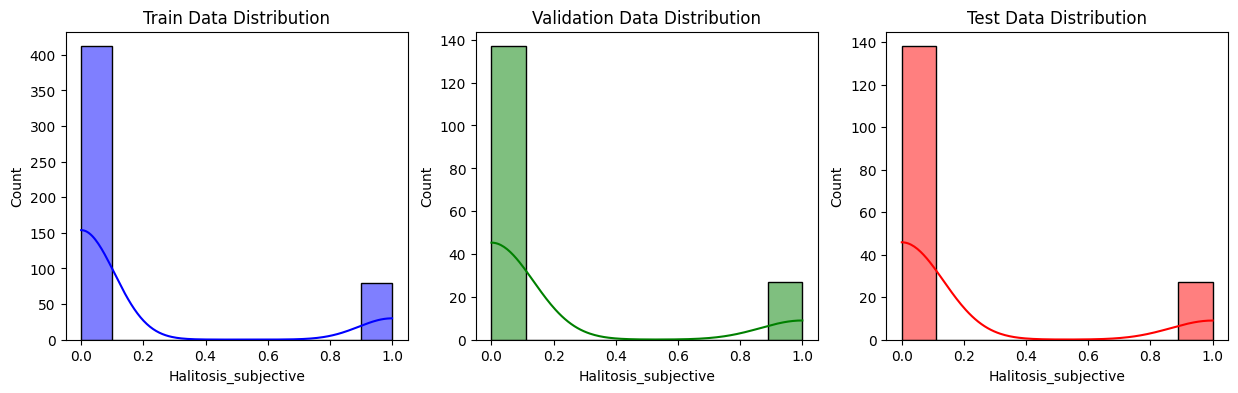

Halitosis_subjective
0    687
1    134
Name: count, dtype: int64


In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(y_train, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Train Data Distribution")

sns.histplot(y_val, kde=True, ax=axes[1], color="green")
axes[1].set_title("Validation Data Distribution")

sns.histplot(y_test, kde=True, ax=axes[2], color="red")
axes[2].set_title("Test Data Distribution")

plt.show()
print(y.value_counts())

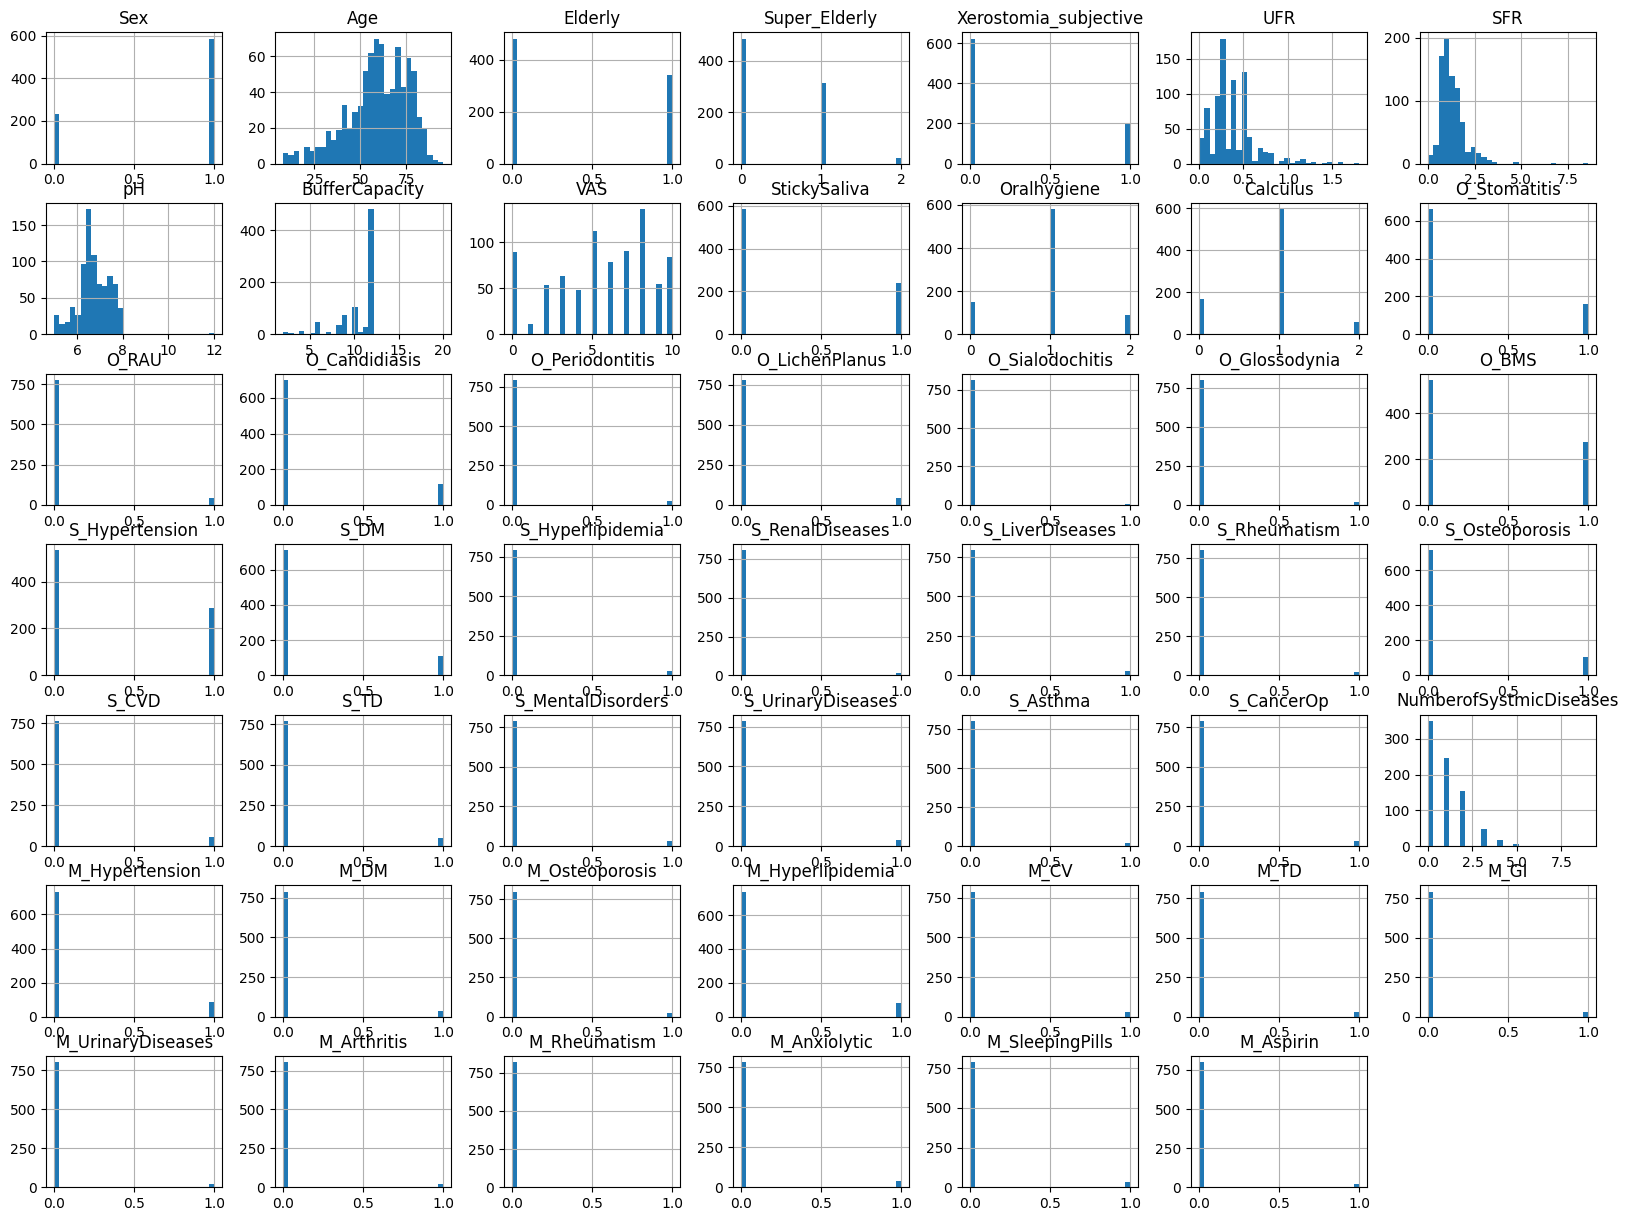

In [26]:
# Input Feature Distribution Check
df[input_features].hist(figsize=(20, 15), bins=30)
plt.show()